# Contents



[Import libraries](#1)

[Data prep/investigation](#2)

[Model training](#3)

[References](#4)

[bookmark](#-1)








# Import libraries

<a id='1'></a>

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from scipy import stats
import pylab

# Data prep/investigation

Import csv file into DF and print first rows for examination, also look at data types.

<a id ='2'></a>



In [3]:
df = pd.read_csv ('House_Rent_Dataset.csv')

print(df.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [4]:
print(df.dtypes)

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object


In [5]:
pd.isnull(df).sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

First impressions from data:

-Rename columns to improve clarity and make them easier to work with in python
<br>-Change data types so they are easier to work with \
-It would seem that there are no missing values in the dataset
<br>-Some data is catogorical (object) and will need transforming into a number for the machine learning to work


In [6]:
#Rename columns
df.rename(columns = {'Posted On':'listed_date',
                        'BHK':'number_of_bedrooms',
                        'Rent':'rent',
                        'Size':'size',
                        'Area Type':'area_type',
                        'City':'city',
                        'Furnishing Status':'furnishing_type',
                        'Tenant Preferred':'preferred_tenant',
                        'Bathroom':'number_of_bathrooms'},inplace = True)

In [7]:
#Investigate Floor column
df['Floor']=df['Floor'].str.split('out of',expand = True)[0]

print(df['Floor'].unique())

df["Floor"] = df["Floor"].replace(['Ground'],0)
df["Floor"] = df["Floor"].replace(['Ground '],0)
df["Floor"] = df["Floor"].replace(['Upper Basement '],-1)
df["Floor"] = df["Floor"].replace(['Lower Basement '],-2)
df["Floor"] = df["Floor"].replace(['3'],'3 ')
df["Floor"] = df["Floor"].replace(['1'],'1 ')

print(df['Floor'].unique())

['Ground ' '1 ' '2 ' '4 ' '3 ' '5 ' '7 ' '8 ' 'Upper Basement ' '11 '
 'Lower Basement ' '6 ' '14 ' '43 ' '13 ' '18 ' '17 ' '9 ' '19 ' '60 '
 '34 ' '12 ' '26 ' '25 ' '53 ' '16 ' '10 ' '39 ' '32 ' '47 ' '28 ' '20 '
 '15 ' '65 ' '40 ' '37 ' '22 ' '21 ' '30 ' '35 ' '33 ' '44 ' '41 ' '46 '
 '27 ' '45 ' '48 ' '50 ' '24 ' '23 ' '29 ' '49 ' '36 ' '76 ' '3' 'Ground'
 '1']
[0 '1 ' '2 ' '4 ' '3 ' '5 ' '7 ' '8 ' -1 '11 ' -2 '6 ' '14 ' '43 ' '13 '
 '18 ' '17 ' '9 ' '19 ' '60 ' '34 ' '12 ' '26 ' '25 ' '53 ' '16 ' '10 '
 '39 ' '32 ' '47 ' '28 ' '20 ' '15 ' '65 ' '40 ' '37 ' '22 ' '21 ' '30 '
 '35 ' '33 ' '44 ' '41 ' '46 ' '27 ' '45 ' '48 ' '50 ' '24 ' '23 ' '29 '
 '49 ' '36 ' '76 ']


In [8]:
# change column datatypes
df['listed_date'] = pd.to_datetime(df.listed_date,yearfirst=True)

checking the cateogorical data to see if it should be included within the model

In [27]:
print(df.nunique())

listed_date              80
number_of_bedrooms        6
rent                    214
size                    594
Floor                    45
area_type                 3
Area Locality          2186
city                      6
furnishing_type           3
preferred_tenant          3
number_of_bathrooms       7
Point of Contact          3
dtype: int64


In [46]:
for column in df:
    if df[column].dtypes == 'object':
        print(df[column].unique())

['Super Area' 'Carpet Area' 'Built Area']
['Bandel' 'Phool Bagan, Kankurgachi' 'Salt Lake City Sector 2' ...
 'BN Reddy Nagar' 'Godavari Homes, Quthbullapur' 'Manikonda, Hyderabad']
['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']
['Unfurnished' 'Semi-Furnished' 'Furnished']
['Bachelors/Family' 'Bachelors' 'Family']
['Contact Owner' 'Contact Agent' 'Contact Builder']


In [56]:
df1 = df.drop(columns = ['Area Locality','listed_date','Floor'])
df1 = pd.get_dummies(df1)

In [58]:
print(df1.head())

   number_of_bedrooms   rent  size  number_of_bathrooms  area_type_Built Area  \
0                   2  10000  1100                    2                     0   
1                   2  20000   800                    1                     0   
2                   2  17000  1000                    1                     0   
3                   2  10000   800                    1                     0   
4                   2   7500   850                    1                     0   

   area_type_Carpet Area  area_type_Super Area  city_Bangalore  city_Chennai  \
0                      0                     1               0             0   
1                      0                     1               0             0   
2                      0                     1               0             0   
3                      0                     1               0             0   
4                      1                     0               0             0   

   city_Delhi  ...  city_Mumbai 

# Model Building

<a id ='3'></a>

Many models assume that the distribution of the dataset is normal. 
If the data is not normal then the assumptions that underpin the model are not valid and as such the prediction power maybe reduced.
We will carry out a couple of tests for normality:
- The shapiro test
- QQ plot

# bookmark

 test for normality and then remove outliers
    
talk about removing outliers, print histogtam. then use zscores 








<a id ='-1'></a>

In [50]:
rent_norm = df1['rent']
rent_norm = stats.norm.rvs(size=4746)

print(stats.shapiro(rent_norm))

ShapiroResult(statistic=0.9996717572212219, pvalue=0.6660515069961548)


Figure(432x288)


C:\Users\Chris\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


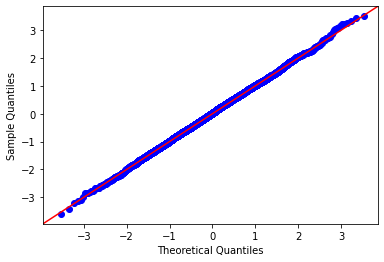

In [10]:
print(sm.qqplot(rent_norm, line='45'))


The pvalue is above .05 so we accept the null hypothesis that this data is normally distributed. The QQ plot confirms this with the data mirroring the red line. We will investigate the data for outliers, as normality can be assumed we can use this to help us.

AxesSubplot(0.125,0.125;0.775x0.755)


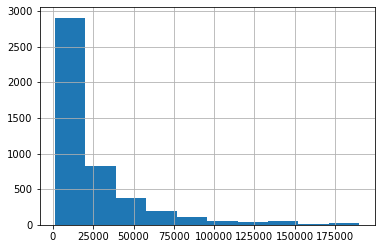

In [51]:
print(df1['rent'].hist())

it is clear there are some outliers. Further investigation is needed.

In [52]:
z = np.abs(stats.zscore(df1['rent']))
df.drop(np.where(z > 2) [0],inplace = True)

KeyError: '[ 542  579  792  832  839 1019 1035 1037 1112 1160 2750] not found in axis'

<AxesSubplot:>

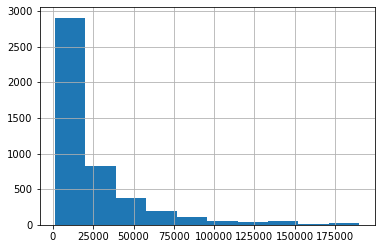

In [53]:
df1['rent'].hist()

Creating scatter plot of rental price against sq feet which is one of the values we will use in the model

<function matplotlib.pyplot.show(close=None, block=None)>

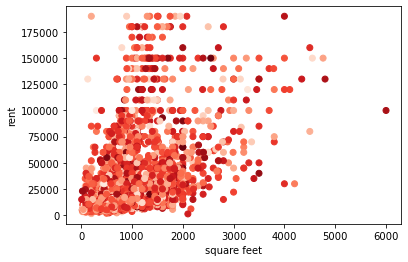

In [54]:
z = np.sqrt(np.random.rand(len(df1['rent']))**2 + np.random.rand(len(df1['rent']))**2)
plt.scatter(x=df1['size'], y=df1['rent'], c=z, cmap = 'Reds' )
plt.xlabel ('square feet')
plt.ylabel ('rent')
plt.ticklabel_format(style='plain')
plt.show

Split data into training and test datasets, then plot to show the split in data (note the graph does not necessarily match the train and test datasets, it is shown as an illustration)

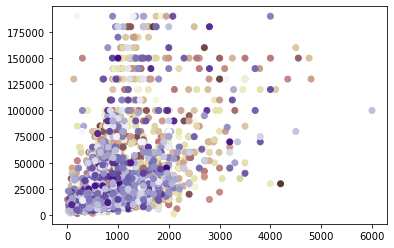

In [15]:

x_train, x_test, y_train, y_test = train_test_split(df['size'], df['rent'])
# x_train, x_test, y_train, y_test = train_test_split(df[['size','Floor']], df['rent']) - for multiple regression
w=np.sqrt(np.random.rand(len(x_train))**2 + np.random.rand(len(x_train))**2)
v=np.sqrt(np.random.rand(len(x_test))**2 + np.random.rand(len(x_test))**2)
print(plt.scatter (x_train, y_train, c=w, cmap = 'pink'))
print(plt.scatter (x_test, y_test, c=v, cmap= 'Purples'))
plt.ticklabel_format(style='plain')

In [16]:
lr=LinearRegression()
lr.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

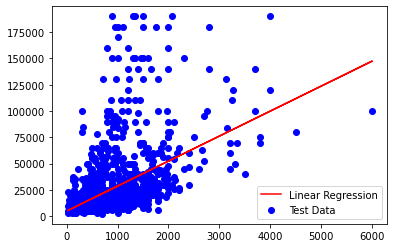

In [17]:
prediction =lr.predict(x_test.values.reshape(-1,1))
plt.plot(x_test, prediction, label = 'Linear Regression', color ='r' )
plt.scatter (x_test,y_test, label = 'Test Data', color = 'b')
plt.legend()
plt.ticklabel_format(style='plain')
plt.show()

In [18]:
lr.score(x_test.values.reshape(-1,1), y_test.values)
#lr.score(x_test.values,y_test.values) - for multiple regression

0.20397529055773123

(array([1353., 1554.,  476.,  353.,  235.,  148.,  107.,   86.,   66.,
          46.,   42.,   15.,   18.,   27.,   21.,   38.,   10.,    7.,
          19.,   11.]),
 array([  1200.,  10640.,  20080.,  29520.,  38960.,  48400.,  57840.,
         67280.,  76720.,  86160.,  95600., 105040., 114480., 123920.,
        133360., 142800., 152240., 161680., 171120., 180560., 190000.]),
 <BarContainer object of 20 artists>)

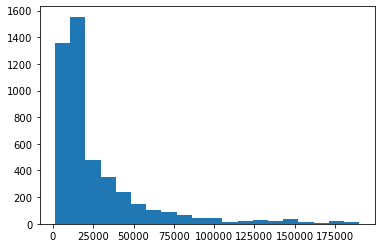

In [19]:
plt.hist(df1['rent'],bins = 20)

In [66]:
x = x_train
y = y_train

x2_train, x2_test, y2_train, y2_test = train_test_split(df1.drop(columns=['rent']),df1['rent'])

x2=x2_train
y2=y2_train

est=sm.OLS(y,x)
est2=est.fit()
print(est2.summary())
est_2=sm.OLS(y2,x2)
est2_2=est_2.fit()
print(est2_2.summary())

print(lr.score(x_test.values.reshape(-1,1), y_test.values)) 



                                 OLS Regression Results                                
Dep. Variable:                   rent   R-squared (uncentered):                   0.551
Model:                            OLS   Adj. R-squared (uncentered):              0.551
Method:                 Least Squares   F-statistic:                              4262.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):                        0.00
Time:                        15:00:43   Log-Likelihood:                         -40371.
No. Observations:                3474   AIC:                                  8.074e+04
Df Residuals:                    3473   BIC:                                  8.075e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Random forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data
rf.fit(x2_train, y2_train)

RandomForestRegressor(n_estimators=1000)

In [68]:
# Use the forest's predict method on the test data
predictions = rf.predict(x2_test)
# Calculate the absolute errors
errors = abs(predictions - y2_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y2_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



Mean Absolute Error: 8749.78
Accuracy: 64.45 %.


--need to add further stages of model development

# bookmark
Move this as required








<a id ='5'></a>

# References
A lot of this work builds on the work from this post: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/code?datasetId=2355600&sortBy=dateCreated

Using colour in jupyter: https://www.techonthenet.com/css/properties/color.php 
e.g <font color=orchid> colour
    
Using hyperlinks in jupyter: https://sebastianraschka.com/Articles/2014_ipython_internal_links.html
    
Adding new lines in markdown: https://stackoverflow.com/questions/41906199/how-to-make-a-new-line-in-a-jupyter-markdown-cell
    
Tests for normality: https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93#:~:text=For%20quick%20and%20visual%20identification,use%20the%20Shapiro%20Wilk%20test.

<a id ='4'></a>

In [ ]:
###  further development work would include using 2 further models.
i would like to use a RF and a clustering model


Trying to convert columns into dummy variables

df['area_type'].unique()

pd.get_dummies(df['area_type'])
